# Modeling and Simulation in Python

Maalvika Bhat

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [3]:
# And an inition condition (with everything in SI units)

r_0 = 147e9

init = State(x = r_0, # m
             y = 0, # radians
             vx = 0, # m/s
             vy = -30330) # m/s

,values
x,1.470000e+11
y,0.000000e+00
vx,0.000000e+00
vy,-3.033000e+04


In [4]:
# Making a system object

r_earth = 6.371e6 # m 
r_sun = 695.508e6 # m

system = System(init=init,
                G = 6.674e-11, # N / kg**2 * m**2
                m1 = 1.989e30, # kg
                r_final=r_sun + r_earth,
                m2=5.972e24, # kg
                t_0=0, # s
                t_end= 3.154e7) # s

,values
init,x 1.470000e+11 y 0.000000e+00 vx 0....
G,6.674e-11
m1,1.989e+30
r_final,7.01879e+08
m2,5.972e+24
t_0,0
t_end,3.154e+07


In [6]:
# Here's a function that computes the force of gravity

def universal_gravitation(vector, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    unpack(system)
    
    mag = -G * m1 * m2 / vector.mag**2
    direction = vector.hat()
    force = direction * mag
    
    return force

In [8]:
testingxy = Vector(init.x, init.y)
universal_gravitation(testingxy, system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'dimensionless')>

In [9]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    
    
    r = Vector(x, y)
    force = universal_gravitation(r, system)
    a = force / m2
    #print(dxdt, dydt)
    
    return vx, vy, a.x, a.y

In [11]:
# Always test the slope function!

slope_func(init, 0, system)

(0.0,
 -30330.0,
 <Quantity(-0.006143082049146188, 'dimensionless')>,
 <Quantity(-0.0, 'dimensionless')>)

In [12]:
# Here's an event function that stops the simulation
# before the collision
"""
def event_func(state, t, system):
    x, y, vx, vy = state
    return r - system.r_final"""

'\ndef event_func(state, t, system):\n    x, y, vx, vy = state\n    return r - system.r_final'

In [13]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, max_step = 500000)#, events=event_func)
details

,values
sol,None
t_events,[]
nfev,464
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


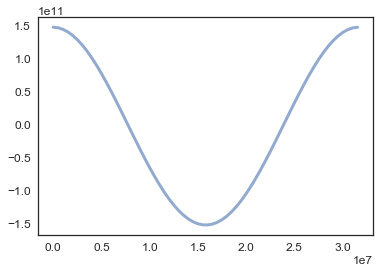

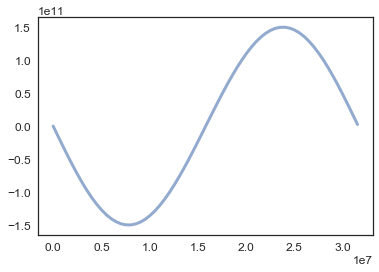

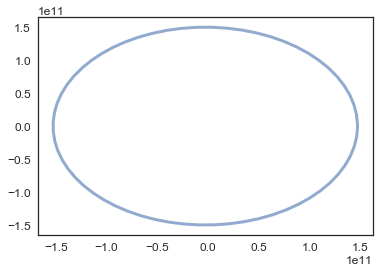

In [16]:
plot(results.x)
plt.figure()
plot(results.y)
plt.figure()
plot(results.x,results.y)

In [19]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(31540000.0, 'second')>

In [20]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(365.04629629629625, 'day')>

In [23]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, t_eval=ts)

In [25]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [26]:
# Scaling the distance to million km

r = results.r / 1e9;

AttributeError: 'TimeFrame' object has no attribute 'r'

In [27]:
# And plotting

plot(r, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

NameError: name 'r' is not defined